In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv


In [2]:
data = pd.read_csv(r'/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')

In [3]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [5]:
#lets add a Revenue column
# revenue = quantity*price
df = data.copy()
df['revenue'] = data.quantity*data.price

In [6]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [7]:
df.shape

(99457, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
 10  revenue         99457 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 8.3+ MB


In [9]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
revenue           float64
dtype: object

In [10]:
df.invoice_date = pd.to_datetime(df.invoice_date,dayfirst=True)

In [11]:
for col in df.select_dtypes(include='object').columns:
    print(col,df[col].unique())

invoice_no ['I138884' 'I317333' 'I127801' ... 'I824010' 'I702964' 'I232867']
customer_id ['C241288' 'C111565' 'C266599' ... 'C103292' 'C800631' 'C273973']
gender ['Female' 'Male']
category ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
payment_method ['Credit Card' 'Debit Card' 'Cash']
shopping_mall ['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


<Axes: xlabel='count', ylabel='shopping_mall'>

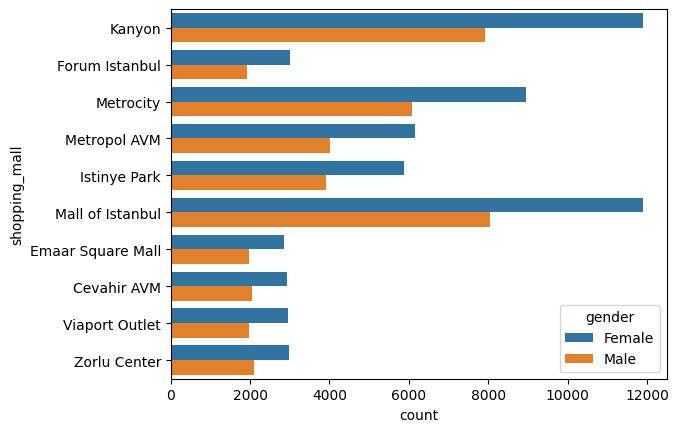

In [12]:
sns.countplot(data=df,y='shopping_mall',hue='gender')

In [13]:
#kanyon , istanbul, metrocity malls having more customers than others 
#females were ahead in every mall !

<Axes: xlabel='category', ylabel='count'>

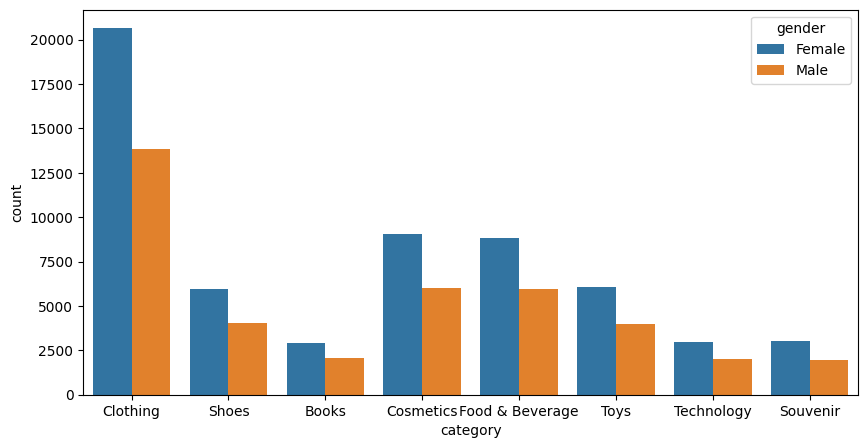

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='category',hue='gender')

In [15]:
# except clothing both male & females follow some patterns and females bought everything more than males!

<Axes: xlabel='shopping_mall'>

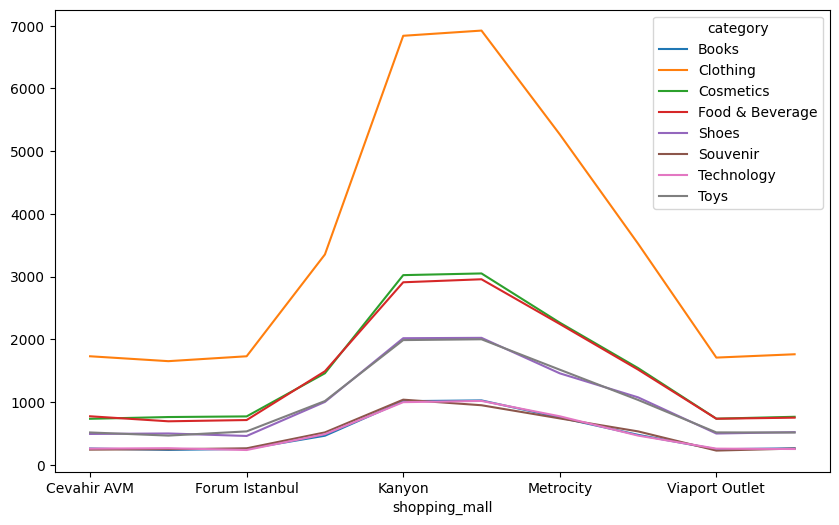

In [16]:
pd.crosstab(df['shopping_mall'],df['category']).plot(figsize=(10,6))

In [17]:
#apart the catgory 'clothing' , many products atmost follow the same pattersn along diff malls!

<Axes: xlabel='shopping_mall'>

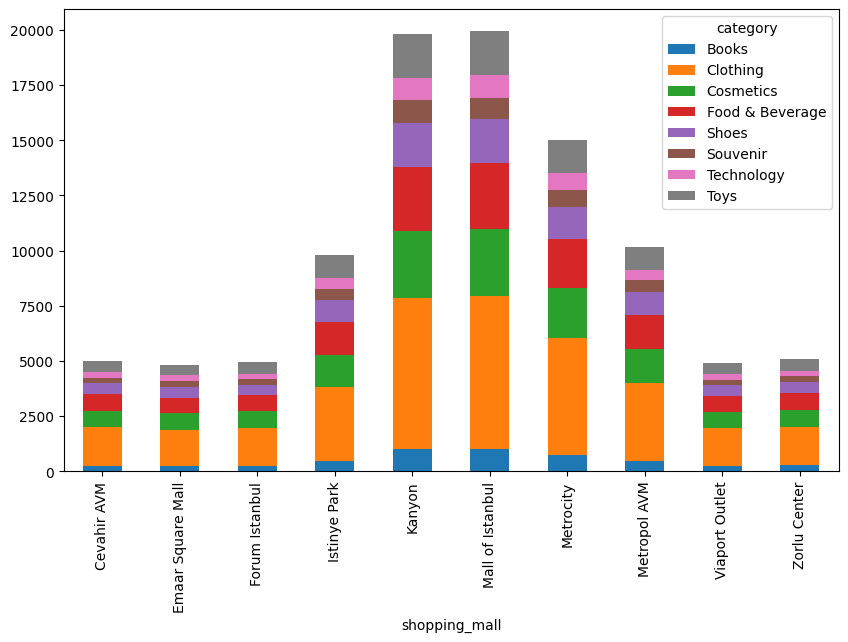

In [18]:
df.groupby(['shopping_mall','category']).size().unstack(fill_value=0).plot(kind='bar',stacked=True,figsize=(10,6))

In [19]:
pd.DataFrame(pd.crosstab(df['category'],df['shopping_mall']).idxmin(),columns=['Category'])

,Category
shopping_mall,
Cevahir AVM,Souvenir
Emaar Square Mall,Books
Forum Istanbul,Technology
Istinye Park,Books
Kanyon,Technology
Mall of Istanbul,Souvenir
Metrocity,Souvenir
Metropol AVM,Technology
Viaport Outlet,Souvenir


In [20]:
pd.DataFrame(pd.crosstab(df['shopping_mall'],df['category']).idxmax(),columns=['Mall'])

,Mall
category,
Books,Mall of Istanbul
Clothing,Mall of Istanbul
Cosmetics,Mall of Istanbul
Food & Beverage,Mall of Istanbul
Shoes,Mall of Istanbul
Souvenir,Kanyon
Technology,Mall of Istanbul
Toys,Mall of Istanbul


In [21]:
#Clothing is the most sold one by every malls & Looking that Souvenir was popular in Kanyon from other cities.


<Axes: xlabel='payment_method', ylabel='Count'>

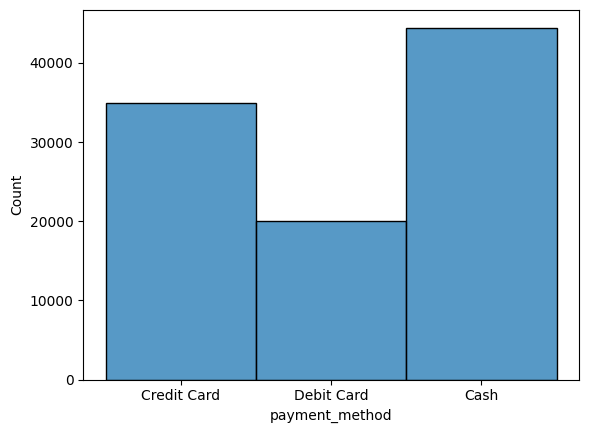

In [22]:
sns.histplot(data=df,x='payment_method')

<Axes: xlabel='shopping_mall'>

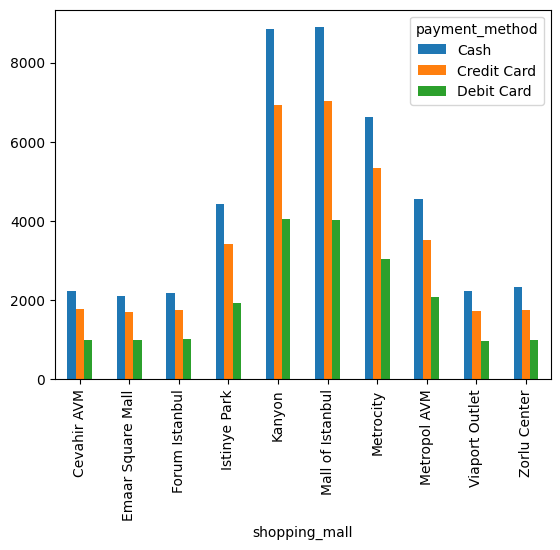

In [23]:
pd.crosstab(df['shopping_mall'],df['payment_method']).plot(kind='bar')

In [24]:
#everything is same across the malls -> cash,credit,debit
df['month'] = df.invoice_date.dt.month

<Axes: xlabel='month'>

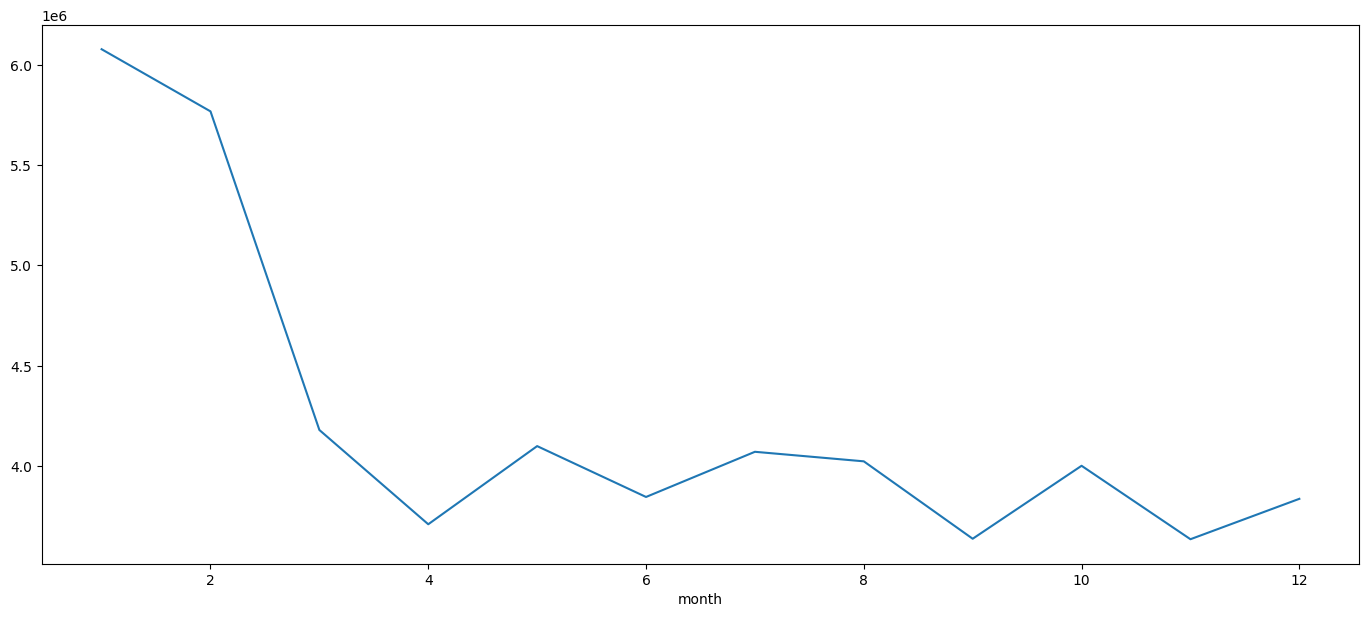

In [25]:
df[df['shopping_mall']=='Mall of Istanbul'].groupby(['month'])['revenue'].sum().plot(figsize=(17,7))

In [26]:
#looks start of the year has some great base (in the birth of new year)
#now enter into customer analysis
#by RFM.
df.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,12


In [27]:
max_date = df.invoice_date.max()
recency = pd.DataFrame(df.groupby(['customer_id'])['invoice_date'].agg(lambda x: (max_date-x.min()).days))

In [28]:
recency.columns =['Days']

In [29]:
frequency = pd.DataFrame(df.groupby(['customer_id'])['quantity'].count())
frequency.columns = ['frequency']

In [30]:
monetary = pd.DataFrame(df.groupby(['customer_id'])['revenue'].sum())
monetary.columns=['monetary']

In [31]:
df['customer_id'].nunique()

99457

In [32]:
rfm = pd.concat([recency,frequency,monetary],axis=1)

In [33]:
sc = StandardScaler()
rfm = sc.fit_transform(rfm)

In [34]:
rfm[:5]

array([[ 0.30502419,  0.        ,  1.17780089],
       [-1.70480575,  0.        , -0.03034   ],
       [-1.30457987,  0.        , -0.52249923],
       [ 0.75310316,  0.        , -0.56792542],
       [ 0.84445906,  0.        , -0.59040287]])

In [35]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm)
    inertia.append(kmeans.inertia_)

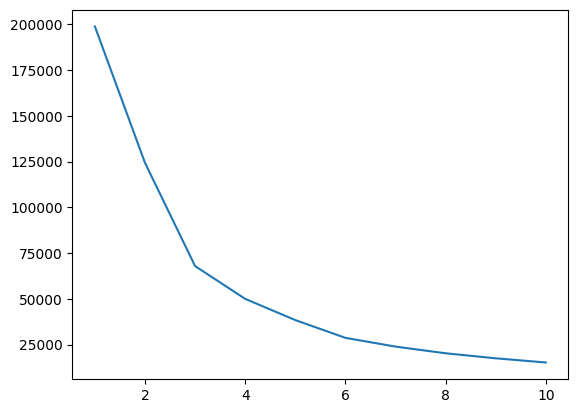

In [36]:
plt.plot(range(1,11),inertia) #elbow - > 3 cluster

In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm)


KMeans(n_clusters=3)

In [38]:
cluster = kmeans.labels_

In [39]:
df['cluster'] = cluster

In [40]:
df.groupby(['cluster'])[['age','revenue']].max()

,age,revenue
cluster,,
0,69,26250.0
1,69,26250.0
2,69,26250.0


### Oh NO!
*Clustering won't works on RFM*
1. since our data having unique customer along the whole dataset the frequency is 1 for everyone
2. Recency score & Monetary score too doesn't group the customers i.e doesn't find the pattern.


### We Can it Different WAY!
*after scrolling & grossing through various books, finally found an approach!*
### RFM
### Recency + Frequency + Monetary => rfm score
the basic idea is to assinging scores for each of the 3 metrics<br>
1.) Recency - defines how recently a customer made a purchase or deal.<br>
*i.e smaller the days higher the score*
2.) Frequency - defines how frequent your customer is making business or purchases can find by invoices<br>
*i.e higher the freq higher the score*
3.) Monetary - defines how much is your customer is making contribution to your business<br>
*i.e higher the Monnetary higher the score*

since frequency is 1 for everyone , ignore that,<br>
and the idea is to divide the whole data into 5 segments by pandas qcut<br>
and assining labels for each metric by the score of it <br>
-> recency - [5,4,3,2,1]<br>
which means lesser one will get higher point(label)<br>
likewise for,<br>
-> monetary - [1,2,3,4,5]<br>
here the lower contributed one will get low score(label)<br>

after finding score for each metric , next is to just generalize the both into a single score(may be concat will better)<br>
after concatenating the 2 scores [recency+monetary] we will get the rfm score (leave freq(1))<br>

and we may manually segregate by looking into the RfM score, one idea is mapping like below<br>
*seg_map = {<br>
    r'[1-2][1-2]': 'hibernating',<br>
    r'[1-2][3-4]': 'at_Risk',<br>
    r'[1-2]5': 'cant_loose',<br>
    r'3[1-2]': 'about_to_sleep',<br>
    r'33': 'need_attention,<br>
    r'[3-4][4-5]': 'loyal_customers',<br>
    r'41': 'promising',<br>
    r'51': 'new_customers',<br>
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'<br>
}*
<br>
those score are having 1st place[1-2] & 2nd place[1-2] were the *hiberenating one*<br>
since they may contribute very less as well they may visited long long ago [.. that's why their score is in b/w 1,2]<br>

Similarly classified other categories(behaviours as well..)<br>


In [41]:
r_score = np.asarray(pd.qcut(recency.values.reshape(99457),5,[5,4,3,2,1]),dtype='str') #it assigns the labels by the way of order 5<4<3<2<1 least recency will get label 5

In [42]:
m_score = np.asarray(pd.qcut(monetary.values.reshape(99457),5,[1,2,3,4,5]),dtype='str')

In [43]:
rfm = pd.concat([recency,frequency,monetary],axis=1)

In [44]:
rfm['rfm_score'] = np.char.add(r_score,m_score)

In [45]:
rfm.dtypes

Days           int64
frequency      int64
monetary     float64
rfm_score     object
dtype: object

In [46]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]':'champions'
}

In [47]:
rfm = rfm.replace(seg_map,regex=True)

In [48]:
rfm.head()

,Days,frequency,monetary,rfm_score
customer_id,,,,
C100004,467,1,7502.00,loyal_customers
C100005,5,1,2400.68,champions
C100006,97,1,322.56,potential_loyalists
C100012,570,1,130.75,hibernating
C100019,591,1,35.84,hibernating


In [49]:
rfm.groupby(['rfm_score'])[['Days','monetary']].agg(['mean','count'])

Days             monetary       
                           mean  count          mean  count
rfm_score                                                  
about_to_sleep       397.017383   8169    122.017051   8169
at_Risk              636.230604  17233   1922.159945  17233
cant_loose           634.030574   6378  10313.817415   6378
champions             78.507926   7885   5968.828725   7885
hibernating          636.499194  16124    123.167182  16124
loyal_customers      316.989234  15791   5892.395186  15791
need_attention       397.393328   3867    648.100590   3867
new_customers         78.831994   4232     37.986009   4232
potential_loyalists  157.924629  15616    427.837898  15616
promising            239.701586   4162     37.932302   4162

<Axes: xlabel='count', ylabel='rfm_score'>

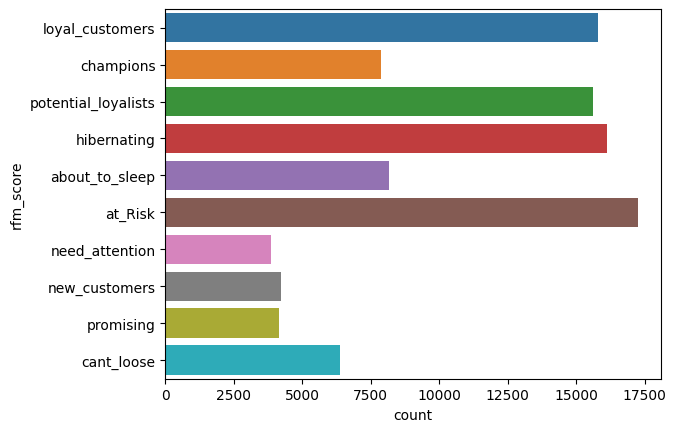

In [50]:
# plt.figure(figsize=(19,5))
sns.countplot(data=rfm,y='rfm_score')


# Results:
1. Moreover, we can see that Kanyon and Mall of Istanbul outperformed other malls.<br>
   *They both follow the same pattern of item distribution, with the highest number being clothing.*<br>
2. Every mall has more female customers compared to male customers, possibly due to clothing.<br>
3. Since Istanbul Mall is a large one, almost every item on the list except souvenirs can be covered in sales.<br>
4. Souvenirs were available at the highest rate at Kanyon Mall compared to other malls.<br>
5. Payments are mostly made in cash, followed by credit and debit cards in every city.<br>
6. With the help of the stacked chart, we can interpret that every mall has a similar weightage of having the stock of items.<br>
<br>
Additionally, I tried to group the customers by RFM score. Unfortunately, this data has n unique customers, and cluster analysis didn't work well. So, I manually segregated them by R+M score into 10 groups, and we have some safe groups as well as a churning group of customers. The bar plot of customer behavior at the mall is plotted above.

### Thank You ! ❤️🤞
--Abubacker S